In [102]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as mlp

In [80]:
# Creating x_n+1
def decenso_gradiente(x_n, alpha, gradiente):
    evaluations = [fx.subs(x_n) for fx in gradiente]
    keys = x_n.keys()

    x_n1 = {}
    for i,k in enumerate(keys):
        x_n1[k] = x_n[k] - alpha * evaluations[i]
    return x_n1

In [74]:
def check_error(x_0, x_n, error):
    for k in x_0.keys():
        if sp.Abs(x_0[k] - x_n[k]) >= error:
            return False
    return True

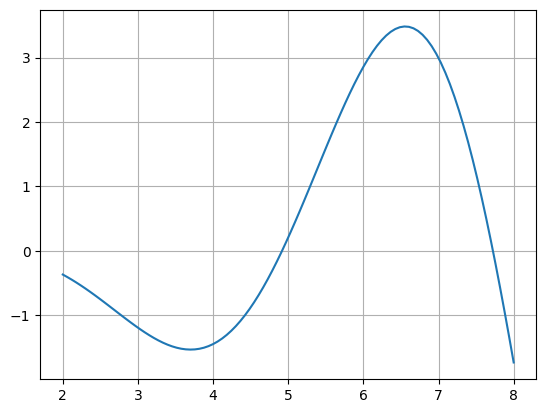

In [193]:
x,y = sp.symbols("x y")
error = 0.01
loops = 10
x_0 = {x: 6}
x_n = {}
alpha = 0.2
f = ((x**2) * sp.cos(x) - x) / 10
gradient = [f.diff(sp) for sp in f.free_symbols]

iter_point = []
iter_evals = []

for i in range(loops):
    x_n = decenso_gradiente(x_n=x_0, alpha=alpha, gradiente=gradient)
    for k in x_n.keys():
        x_0[k] = x_n[k].evalf()

# Plotting
lambx = sp.lambdify(x, f, modules=["numpy"])

x_vals = np.linspace(2, 8, 100)
fx = lambx(x_vals)

mlp.grid()
mlp.plot(x_vals, fx)